I've noticed in some places that the model bathymetry in Boundary Pass doesn't seem to match with reality. 

See these two notebooks:
* http://nbviewer.ipython.org/urls/bitbucket.org/salishsea/analysis/raw/tip/Nancy/strat/comparisons/ONC%20Moorings.ipynb
* http://nbviewer.ipython.org/urls/bitbucket.org/salishsea/analysis/raw/tip/Nancy/strat/comparisons/Fall%202014%20IOS%20data.ipynb

Is this a consistent error or is it just a discrepancy with the closest model grid point? I will investigate by looking at the bathymetry near the observations points as well.

In [2]:
import sys
import pandas as pd
sys.path.insert(0, './strat/comparisons/')
import ONC
import ACTDR
import comparisons
from salishsea_tools import tidetools
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Model files

In [3]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

bathy = grid.variables['Bathymetry'][:]
lons = grid.variables['nav_lon'][:]
lats = grid.variables['nav_lat'][:]

## ONC Mooring Point

In [4]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/BoundaryPass//'
               'BoundaryPass_BoundaryPassMooring_CTD_20140411T175025Z_20150408T235058Z-NaN_clean.csv')

In [5]:
data, lat, lon, depth =  ONC.load_mooring_csv(csvfilename)
print(lat,lon, depth)

(48.766222, -123.039194, 234.0)


./strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)


In [6]:
j,i = tidetools.find_closest_model_point(lon,lat,lons, lats, bathy)
print(j,i, bathy[j,i])

(343, 289, 205.0)


At the closest grid point, the model bathymetry is 30m shallower. What about neighbouring points?

In [7]:
stp = 3
print(bathy[j-stp:j+stp,i-stp:i+stp])

[[184.0 192.0 188.0 186.0 101.625 62.375]
 [197.0 196.0 208.0 208.0 178.0 116.625]
 [207.0 203.0 208.0 204.0 189.0 159.0]
 [202.0 205.0 210.0 205.0 180.0 201.0]
 [195.0 196.0 192.0 192.0 200.0 197.0]
 [195.0 191.0 186.0 139.25 164.625 192.0]]


/home/nsoontie/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


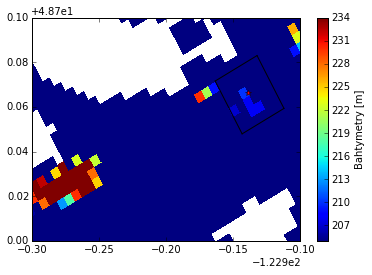

In [8]:
plt.pcolormesh(lons, lats,bathy,vmin=205,vmax=234)
cbar = plt.colorbar()
cbar.set_label('Bahtymetry [m]')
plt.plot([lons[j-stp,i-stp], lons[j-stp,i+stp]], [lats[j-stp,i-stp], lats[j-stp,i+stp] ] ,'k')
plt.plot([lons[j-stp,i-stp], lons[j+stp,i-stp]], [lats[j-stp,i-stp], lats[j+stp,i-stp] ] ,'k')
plt.plot([lons[j+stp,i+stp], lons[j-stp,i+stp]], [lats[j+stp,i+stp], lats[j-stp,i+stp] ],'k')
plt.plot([lons[j+stp,i+stp], lons[j+stp,i-stp]], [lats[j+stp,i+stp], lats[j+stp,i-stp] ],'k')
plt.axis([-123.2,-123, 48.7,48.8])
plt.plot(lon, lat,'r*')

No where in this neighourhood do we get close to 234m depth. Is the depth record in the ONC file accurate?

# IOS Cast

In [9]:
ACTDR.load_dat('strat/comparisons/SOG_2000.dat')
data = pd.DataFrame(ACTDR.CTD_DAT)

('> open ', 'strat/comparisons/SOG_2000.dat')
> load CTD_DAT
> load STANDARD_KEYS
('> close ', 'strat/comparisons/SOG_2000.dat')
> complete


In [10]:


lon_min=-123.49
lon_max=-122
lat_min=48.75
lat_max=48.8
data_BP = comparisons.isolate_region(data,lon_min, lon_max, lat_min, lat_max)
data_fall_BP  = data_BP[(data_BP.Year>=2014) & (data_BP.Month >=10)  ]



In [11]:
lon = data_fall_BP.Longitude
lat = data_fall_BP.Latitude
depths = data_fall_BP.Depth
print(lon.values[0], lat.values[0], max(depths.values[0]))

(-123.027, 48.771999999999998, 211.08877605139131)


In [12]:
j,i = tidetools.find_closest_model_point(lon.values[0],lat.values[0],lons, lats, bathy)
print(j,i, bathy[j,i])

(343, 292, 131.0)


The model is 80m shallower! Neighbouring points

In [13]:
stp = 3
print(bathy[j-stp:j+stp,i-stp:i+stp])

[[186.0 101.625 62.375 63.3125 59.0 128.0]
 [208.0 178.0 116.625 55.375 45.4375 94.9375]
 [204.0 189.0 159.0 120.0 102.625 114.0]
 [205.0 180.0 201.0 131.0 129.0 149.0]
 [192.0 200.0 197.0 140.0 142.0 172.0]
 [139.25 164.625 192.0 188.0 174.0 184.0]]


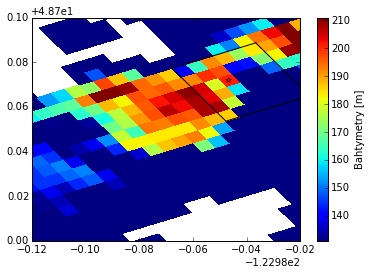

In [14]:
plt.pcolormesh(lons, lats,bathy,vmin=131,vmax=211)
cbar = plt.colorbar()
cbar.set_label('Bahtymetry [m]')
plt.plot([lons[j-stp,i-stp], lons[j-stp,i+stp]], [lats[j-stp,i-stp], lats[j-stp,i+stp] ] ,'k')
plt.plot([lons[j-stp,i-stp], lons[j+stp,i-stp]], [lats[j-stp,i-stp], lats[j+stp,i-stp] ] ,'k')
plt.plot([lons[j+stp,i+stp], lons[j-stp,i+stp]], [lats[j+stp,i+stp], lats[j-stp,i+stp] ],'k')
plt.plot([lons[j+stp,i+stp], lons[j+stp,i-stp]], [lats[j+stp,i+stp], lats[j+stp,i-stp] ],'k')
plt.axis([-123.1,-123, 48.7,48.8])
plt.plot(lon.values[0], lat.values[0],'r*')

The point at find_closest_model_point is too shallow but there are neighouring points at an appropriate depth. 